# Causes Of Death In Indonesia

Import library yang akan digunakan.

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Menginput data yang akan digunakan

In [220]:
data = pd.read_csv("Penyebab Kematian di Indonesia yang Dilaporkan - Raw.csv")

In [221]:
data.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            1062 non-null   object
 1   Type             1062 non-null   object
 2   Year             1062 non-null   int64 
 3   Data Redundancy  1062 non-null   int64 
 4   Total Deaths     1062 non-null   int64 
 5   Source           1062 non-null   object
 6   Page at Source   1060 non-null   object
 7   Source URL       1060 non-null   object
dtypes: int64(3), object(5)
memory usage: 66.5+ KB


### Handling Missing Values

In [223]:
data.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     2
Source URL         2
dtype: int64

In [224]:
data[data.isna().any(axis=1)]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
323,COVID-19,Bencana Non Alam dan Penyakit,2021,1,121956,COVID19.go.id,NaN,NaN
324,COVID-19,Bencana Non Alam dan Penyakit,2022,1,12876,COVID19.go.id,NaN,NaN


Mengganti nilai NaN dengan "Unknown"

In [225]:
data['Page at Source'] = data['Page at Source'].fillna('Unknown')
data['Source URL'] = data['Source URL'].fillna('Unknown')

In [226]:
data.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
dtype: int64

### Mengecek Duplikat

Data Redundancy yang bernilai lebih dari 1 mengacu adanya keberadaan data yang duplikat. Untuk row data yang memiliki data redudancy yang lebih dari 1, dipilih data dari laporan tahun terakhir, dengan asumsi bahwa laporan tahun terakhir merupakan update/perbaikan terbaru dari data tahun yang lalu. Untuk row data yang memiliki data redudancy yang lebih dari 1 di tahun yang sama, dipilih data yang memiliki jumlah total paling besar.

In [227]:
data[data.duplicated(['Cause', 'Year'], keep=False)]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
4,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
5,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2007,84,https://pusdatin.kemkes.go.id/download.php?fil...
6,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2008,102,https://pusdatin.kemkes.go.id/download.php?fil...
7,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2009,95,https://pusdatin.kemkes.go.id/download.php?fil...
8,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
1026,Tetanus Neonatorium,Bencana Non Alam dan Penyakit,2005,2,82,Profil Kesehatan Indonesia Tahun 2005,Lampiran 3.16,https://pusdatin.kemkes.go.id/download.php?fil...
1027,Tetanus Neonatorium,Bencana Non Alam dan Penyakit,2006,2,37,Profil Kesehatan Indonesia Tahun 2006,21,https://pusdatin.kemkes.go.id/download.php?fil...
1028,Tetanus Neonatorium,Bencana Non Alam dan Penyakit,2006,2,46,Profil Kesehatan Indonesia Tahun 2006,40,https://pusdatin.kemkes.go.id/download.php?fil...
1043,Tetanus Neonatorium,Bencana Non Alam dan Penyakit,2021,2,9,Profil Kesehatan Indonesia Tahun 2021,Lampiran 62.a,https://www.kemkes.go.id/downloads/resources/d...


In [232]:
data.drop_duplicates(['Cause', 'Type', 'Year'], keep='last', inplace=True)

### Menghapus kolom yang tidak digunakan pada analisis ini

In [229]:
data.drop(['Data Redundancy', 'Page at Source', 'Source URL'], axis=1, inplace=True)

In [230]:
data.head()

,Cause,Type,Year,Total Deaths,Source
0,Abrasi Air Laut,Bencana Alam,2012,0,Profil Kesehatan Indonesia Tahun 2012
1,AIDS,Bencana Non Alam dan Penyakit,2000,47,Profil Kesehatan Indonesia Tahun 2004
2,AIDS,Bencana Non Alam dan Penyakit,2001,99,Profil Kesehatan Indonesia Tahun 2004
3,AIDS,Bencana Non Alam dan Penyakit,2002,100,Profil Kesehatan Indonesia Tahun 2004
8,AIDS,Bencana Non Alam dan Penyakit,2003,261,Profil Kesehatan Indonesia Tahun 2010


In [233]:
data.describe

<bound method NDFrame.describe of                          Cause                           Type  Year  \
0              Abrasi Air Laut                   Bencana Alam  2012   
1                         AIDS  Bencana Non Alam dan Penyakit  2000   
2                         AIDS  Bencana Non Alam dan Penyakit  2001   
3                         AIDS  Bencana Non Alam dan Penyakit  2002   
8                         AIDS  Bencana Non Alam dan Penyakit  2003   
...                        ...                            ...   ...   
1057  Wabah Penyakit (Epidemi)  Bencana Non Alam dan Penyakit  2016   
1058  Wabah Penyakit (Epidemi)  Bencana Non Alam dan Penyakit  2017   
1059  Wabah Penyakit (Epidemi)  Bencana Non Alam dan Penyakit  2019   
1060  Wabah Penyakit (Epidemi)  Bencana Non Alam dan Penyakit  2020   
1061  Wabah Penyakit (Epidemi)  Bencana Non Alam dan Penyakit  2021   

      Total Deaths                                 Source  
0                0  Profil Kesehatan Indonesia Tahun 

In [234]:
data.groupby('Cause')['Total Deaths'].sum()

Cause
AIDS                           7385
Abrasi Air Laut                   0
Aksi Teror dan Sabotase          42
Angin Puting Beliung            100
Angin Siklon Tropis              37
                              ...  
Tsunami Aceh (Meninggal)     129171
Tuberkulosis                  39315
Tuberkulosis paru              3852
Tuberkulosis paru lainnya      2024
Wabah Penyakit (Epidemi)          0
Name: Total Deaths, Length: 181, dtype: int64

### Mengelompokkan tipe bencana

In [242]:
type_groupings = data.groupby('Type')['Total Deaths'].sum()
type_groupings

Type
Bencana Alam                     185290
Bencana Non Alam dan Penyakit    777401
Bencana Sosial                      261
Name: Total Deaths, dtype: int64

([<matplotlib.patches.Wedge at 0x1913b189e40>,
 [Text(0.9050642315291113, 0.625186961481619, 'Bencana Alam'),
  Text(-0.9055962721296661, -0.6244160407171264, 'Bencana Non Alam dan Penyakit'),
  Text(1.099999601157081, -0.0009367252868737955, 'Bencana Sosial')],
 [Text(0.49367139901587886, 0.3410110698990649, '19.24187%'),
  Text(-0.49396160297981784, -0.34059056766388707, '80.73102%'),
  Text(0.5999997824493167, -0.0005109410655675247, '0.02710%')])

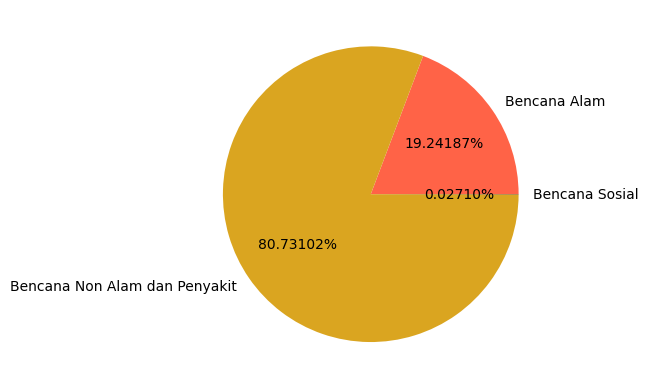

In [257]:
plt.pie(type_groupings.values, labels=type_groupings.index, colors=['tomato', 'goldenrod', 'black'], autopct='%1.5f%%')

### Penyebab bencana dengan korban terbanyak berdasarkan masing2 tipenya

Bencana Non Alam dan Penyakit

In [247]:
nonalam_penyakit = data.query('Type=="Bencana Non Alam dan Penyakit"')
nonalam_penyakit_group = nonalam_penyakit.groupby('Cause')['Total Deaths'].sum()
nonalam_penyakit_group

Cause
AIDS                              7385
Antraks                             35
Avian Influenza (Flu Burung)       168
Batuk Rejan                          5
COVID-19                        156970
                                 ...  
Tetanus Neonatorium               1272
Tuberkulosis                     39315
Tuberkulosis paru                 3852
Tuberkulosis paru lainnya         2024
Wabah Penyakit (Epidemi)             0
Name: Total Deaths, Length: 143, dtype: int64

([<matplotlib.patches.Wedge at 0x1913ad959c0>,
 [Text(0.36435463740983154, 1.0379044745052168, 'COVID-19'),
  Text(-1.0999076957649434, 0.014249940247349352, 'Penyakit Sistem Sirkulasi Darah'),
  Text(-0.4809110591575644, -0.9893050859972115, 'Penyakit Infeksi & Parasit Tertentu'),
  Text(0.5126367469885298, -0.9732438366807253, 'Kecelakaan Lalu Lintas'),
  Text(1.0479466152991448, -0.33437687043673703, 'Tuberkulosis')],
 [Text(0.19873889313263535, 0.5661297133664819, '39.3%'),
  Text(-0.5999496522354236, 0.007772694680372373, '21.1%'),
  Text(-0.26231512317685324, -0.5396209559984789, '14.9%'),
  Text(0.27962004381192535, -0.5308602745531228, '14.9%'),
  Text(0.5716072447086243, -0.18238738387458384, '9.8%')])

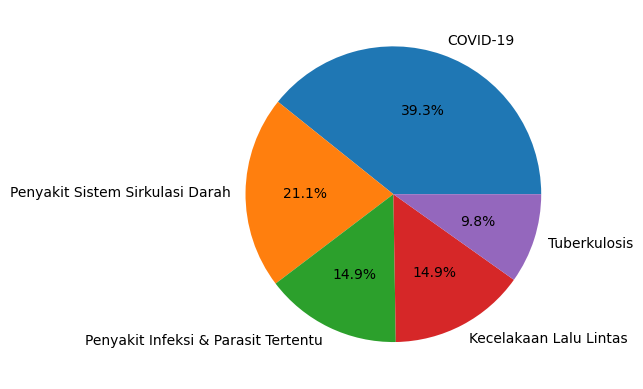

In [252]:
top_5 = nonalam_penyakit_group.sort_values(ascending=False).head(5)
plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%')

Bencana Alam

In [266]:
alam = data.query('Type=="Bencana Alam"')
alam_group = alam.groupby('Cause')['Total Deaths'].sum()
alam_group

Cause
Abrasi Air Laut                                                      0
Angin Puting Beliung                                               100
Angin Siklon Tropis                                                 37
Angin Topan                                                          0
Angin Topan / Angin Puting Beliung / Angin Puyuh                    19
Angin kencang                                                        3
Angin siklon tropis (angin kencang dan angin puting beliung)         4
Banjir                                                             758
Banjir Bandang                                                    1148
Banjir Bandang dan Angin Siklon Tropis                               0
Banjir Bandang dan Tanah Longsor                                     2
Banjir Lahar Dingin                                                 12
Banjir dan Tanah Longsor                                           664
Banjir disertai Tanah Longsor                                       40


([<matplotlib.patches.Wedge at 0x1913cd71870>,
 [Text(-0.6842530236853465, 0.8612768425874812, 'Tsunami Aceh (Meninggal)'),
  Text(0.4518583326211554, -1.0029077959816792, 'Tsunami Aceh (Hilang)'),
  Text(1.046178610928565, -0.33986808328464574, 'Gempa Bumi'),
  Text(1.0958646565477885, -0.09529246837708473, 'Gempa Bumi dan Tsunami'),
  Text(1.0997649389542574, -0.022739372175560296, 'Tanah Longsor')],
 [Text(-0.373228922010189, 0.46978736868408055, '71.4%'),
  Text(0.2464681814297211, -0.5470406159900068, '20.7%'),
  Text(0.570642878688308, -0.185382590882534, '5.8%'),
  Text(0.5977443581169755, -0.05197771002386439, '1.4%'),
  Text(0.5998717848841404, -0.012403293913941979, '0.7%')])

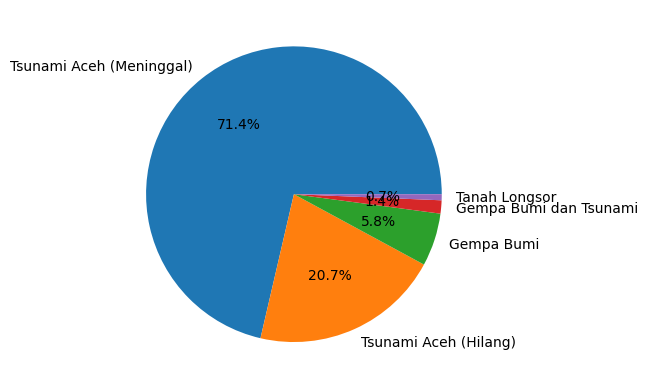

In [265]:
top_5 = alam_group.sort_values(ascending=False).head(5)
plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%')

Bencana Sosial

In [267]:
sosial = data.query('Type=="Bencana Sosial"')
sosial_group = sosial.groupby('Cause')['Total Deaths'].sum()
sosial_group

Cause
Aksi Teror dan Sabotase                 42
Bencana kelaparan                        1
Konflik                                 83
Konflik Sosial                          66
Konflik Sosial atau Kerusuhan Sosial    69
Name: Total Deaths, dtype: int64

([<matplotlib.patches.Wedge at 0x1913cee9720>,
 [Text(0.5952111513722933, 0.925053341857684, 'Konflik'),
  Text(-1.0465705330491364, 0.33865929686522195, 'Konflik Sosial atau Kerusuhan Sosial'),
  Text(-0.2815024065164093, -1.06337030009563, 'Konflik Sosial'),
  Text(0.9493005969190456, -0.5557232914762021, 'Aksi Teror dan Sabotase'),
  Text(1.0999203151741122, -0.01324010072778082, 'Bencana kelaparan')],
 [Text(0.3246606280212509, 0.5045745501041912, '31.8%'),
  Text(-0.570856654390438, 0.18472325283557559, '26.4%'),
  Text(-0.15354676719076868, -0.5800201636885255, '25.3%'),
  Text(0.5178003255922067, -0.30312179535065564, '16.1%'),
  Text(0.5999565355495157, -0.007221873124244082, '0.4%')])

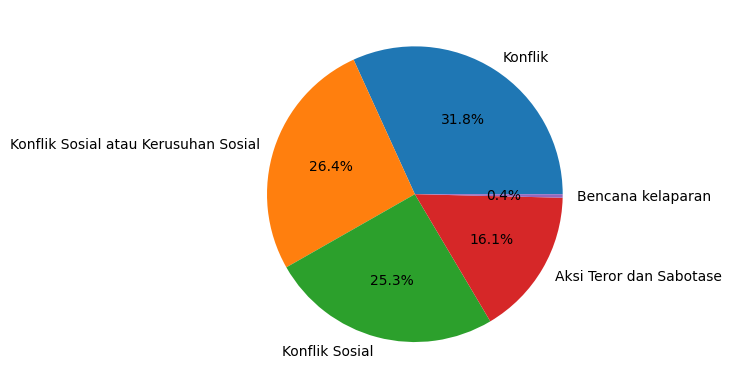

In [269]:
top_5 = sosial_group.sort_values(ascending=False)
plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%')

### analisis trent 3 penyebab bencana dengan korban terbanyak

Bencana Non Alam dan Penyakit yaitu Covid19.
Bencana Alam yaitu Tsunami Aceh, tapi karena hanya terjadi pada tahun 2004 maka akan digunakan data Gempa Bumi.
Bencana Sosial yaitu Konflik.

Text(0, 0.5, 'Total Deaths')

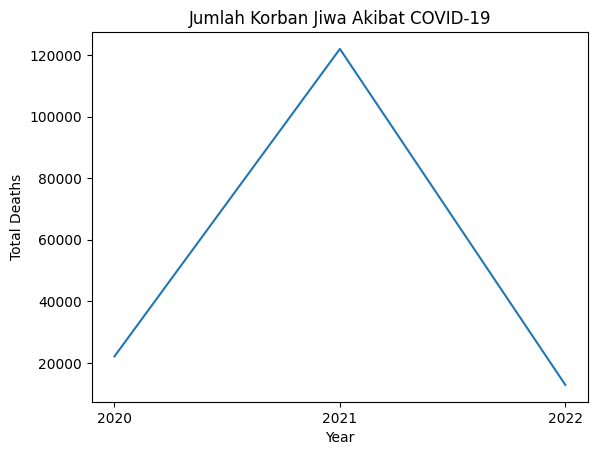

In [294]:
covid_19 = data.query('Cause=="COVID-19"')
plt.plot(covid_19['Year'], covid_19['Total Deaths'])
plt.xticks([2020, 2021, 2022])
plt.title('Jumlah Korban Jiwa Akibat COVID-19')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

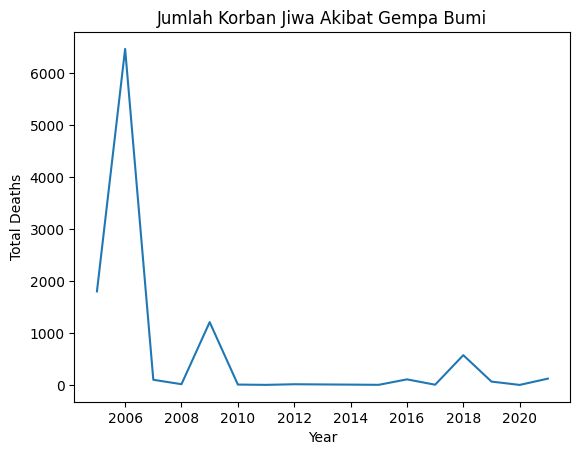

In [280]:
gempa_bumi = data.query('Cause=="Gempa Bumi"')
plt.plot(gempa_bumi['Year'], gempa_bumi['Total Deaths'])
plt.title('Jumlah Korban Jiwa Akibat Gempa Bumi')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total Deaths')

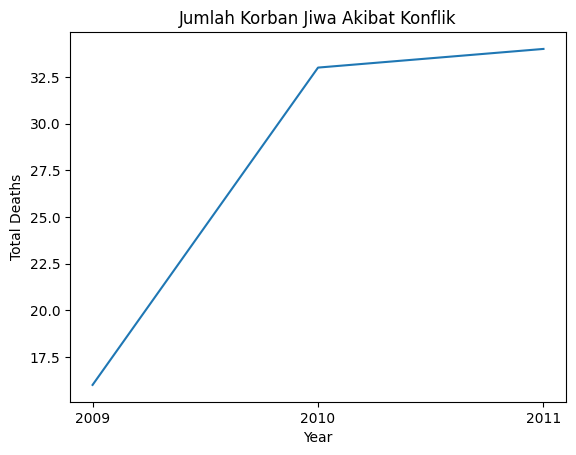

In [285]:
konflik = data.query('Cause=="Konflik"')
plt.plot(konflik['Year'], konflik['Total Deaths'])
plt.xticks([2009, 2010, 2011])
plt.title('Jumlah Korban Jiwa Akibat Konflik')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

### Bencana yang paling sering terjadi 3 tahun terakhir (2020-2022)

In [293]:
bencana_22 = data.query('Year==(2020,2021,2022)')
bencana_22.sort_values('Total Deaths' ,ascending=False).head(20)

,Cause,Type,Year,Total Deaths,Source
323,COVID-19,Bencana Non Alam dan Penyakit,2021,121956,COVID19.go.id
322,COVID-19,Bencana Non Alam dan Penyakit,2020,22138,Profil Kesehatan Indonesia Tahun 2020 dan COVI...
1054,Tuberkulosis,Bencana Non Alam dan Penyakit,2021,14148,Profil Kesehatan Indonesia Tahun 2021
1053,Tuberkulosis,Bencana Non Alam dan Penyakit,2020,13174,Profil Kesehatan Indonesia Tahun 2020
324,COVID-19,Bencana Non Alam dan Penyakit,2022,12876,COVID19.go.id
714,Kronis Filariasis,Bencana Non Alam dan Penyakit,2020,891,Profil Kesehatan Indonesia Tahun 2020
349,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2020,747,Profil Kesehatan Indonesia Tahun 2020
351,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2021,705,Profil Kesehatan Indonesia Tahun 2021
43,AIDS,Bencana Non Alam dan Penyakit,2021,688,Profil Kesehatan Indonesia Tahun 2021
42,AIDS,Bencana Non Alam dan Penyakit,2020,665,Profil Kesehatan Indonesia Tahun 2020
